In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read in data
data = pd.read_csv("climbing_data.csv", index_col=0)
# drop duplicates
data = data.drop_duplicates()

## We want to investigate only world cups. Due to non consistent naming of events, we have to filter out all events that are not world cups.
# filter youth events
data = data[~data["name"].str.lower().str.contains("youth")]
# filter paraclimbing
data = data[~data["name"].str.lower().str.contains("para")]
# filter continental championships
data = data[~data["name"].str.lower().str.contains("continental")]
# filter pan american championships
data = data[~data["name"].str.lower().str.contains("pan")]
# filter asian championships
data = data[~data["name"].str.lower().str.contains("asia")]
# filter african championships
data = data[~data["name"].str.lower().str.contains("africa")]
# filter european championships
data = data[~data["name"].str.lower().str.contains("europe")]
# drop duplicates
data = data.drop_duplicates()
# drop nan values
data = data[data["rank"].notna()]
# parse dates
data["starts_at"] = pd.to_datetime(data["starts_at"])
data["ends_at"] = pd.to_datetime(data["ends_at"])
data["season"] = data["starts_at"].dt.year
display(data.head())
display(data.shape)

,name,league_id,league_season_id,season_id,starts_at,ends_at,location,dcat_name,discipline_kind,category_name,rank,athlete_id,firstname,lastname,paraclimbing_sport_class,country,category_round_id,round_name,score,season
id,,,,,,,,,,,,,,,,,,,,
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,469,Qualification,1.22,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,6136,Semi-Final,39+,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,1.0,1364,Adam,ONDRA,NaN,CZE,6138,Final,TOP,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,2.0,1129,Domen,SKOFIC,NaN,SLO,469,Qualification,9.5,2020
65,IFSC - Climbing World Cup (L) - Briançon (FRA)...,1,14,2,2020-08-20 22:00:00+00:00,2020-08-22 21:59:00+00:00,Briançon,LEAD Men,lead,Men,2.0,1129,Domen,SKOFIC,NaN,SLO,6136,Semi-Final,33+,2020


(48301, 20)

## How many different Boulder- and Climing cups are there?

In [3]:
lead = data[data["discipline_kind"] == "lead"]
boulder = data[data["discipline_kind"] == "boulder"]
print(
    "lead unique cups {}, datapoints {}".format(
        lead["name"].unique().shape, lead["name"].shape
    )
)
print(
    "boulder unique cups {}, datapoints {}".format(
        boulder["name"].unique().shape, boulder["name"].shape
    )
)
lead_cups = lead["name"].value_counts()
boulder_cups = boulder["name"].value_counts()
display(lead_cups)
display(boulder_cups)

lead unique cups (120,), datapoints (20204,)
boulder unique cups (105,), datapoints (18943,)


IFSC Climbing World Championships - Innsbruck (AUT) 2018    297
IFSC Climbing Worldcup (L, S) - Chamonix (FRA) 2019         282
IFSC - Climbing World Cup (B,L) - Innsbruck (AUT) 2022      281
IFSC Climbing Worldcup (L,S) - Chamonix (FRA) 2018          273
IFSC Climbing World Championships - Hachioji (JPN) 2019     258
                                                           ... 
IFSC Climbing Worldcup (L,S) - Wujiang (CHN) 2014            90
IFSC World Championship Lead Group A - Paris 2012            85
IFSC World Championship Lead Group B - Paris 2012            82
IFSC Climbing Worldcup (L) - Amman (JOR) 2011                77
IFSC Climbing Worldcup (L, S) - Xining (CHN) 2010            62
Name: name, Length: 120, dtype: int64

IFSC - Climbing World Cup (B,S) - Salt Lake City (USA) 2022    355
IFSC Climbing Worldcup (B) - Munich (GER) 2017                 332
IFSC Climbing World Championships - Innsbruck (AUT) 2018       314
IFSC - Climbing World Cup (B,L) - Innsbruck (AUT) 2022         284
IFSC Climbing Worldcup (B) - Munich (GER) 2018                 282
                                                              ... 
IFSC Climbing Worldcup (B) - Reunion (FRA) 2008                106
IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2013            102
IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2012            101
IFSC Climbing Worldcup (L, B, S) - Haiyang (CHN) 2014           98
IFSC Climbing Worldcup (B) - La Reunion (FRA) 2007              77
Name: name, Length: 105, dtype: int64

## How many climbing and boulder cups per year

<AxesSubplot: title={'center': 'Number of lead cups per year'}, xlabel='year', ylabel='number of cups'>

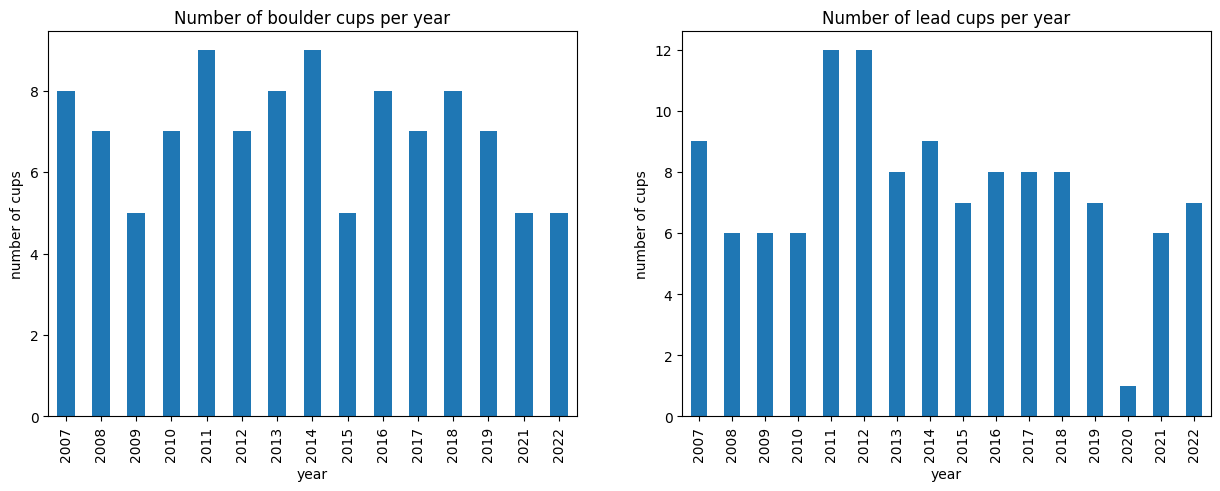

In [4]:
# count unique cups per year and group by year
bouldercups_per_year = boulder.groupby("season")["name"].nunique()
leadcups_per_year = lead.groupby("season")["name"].nunique()
# plot as bar chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
bouldercups_per_year.plot(
    kind="bar",
    title="Number of boulder cups per year",
    xlabel="year",
    ylabel="number of cups",
    ax=axes[0],
)
leadcups_per_year.plot(
    kind="bar",
    title="Number of lead cups per year",
    xlabel="year",
    ylabel="number of cups",
    ax=axes[1],
)

We can see that the number of cups in 2020 is much lower than in previous years. This is probably due to the corona pandemic. We will remove this year from our analysis.

In [5]:
# remove year 2020
boulder = boulder[boulder["season"] != 2020]
lead = lead[lead["season"] != 2020]

## How often do athletes compete?

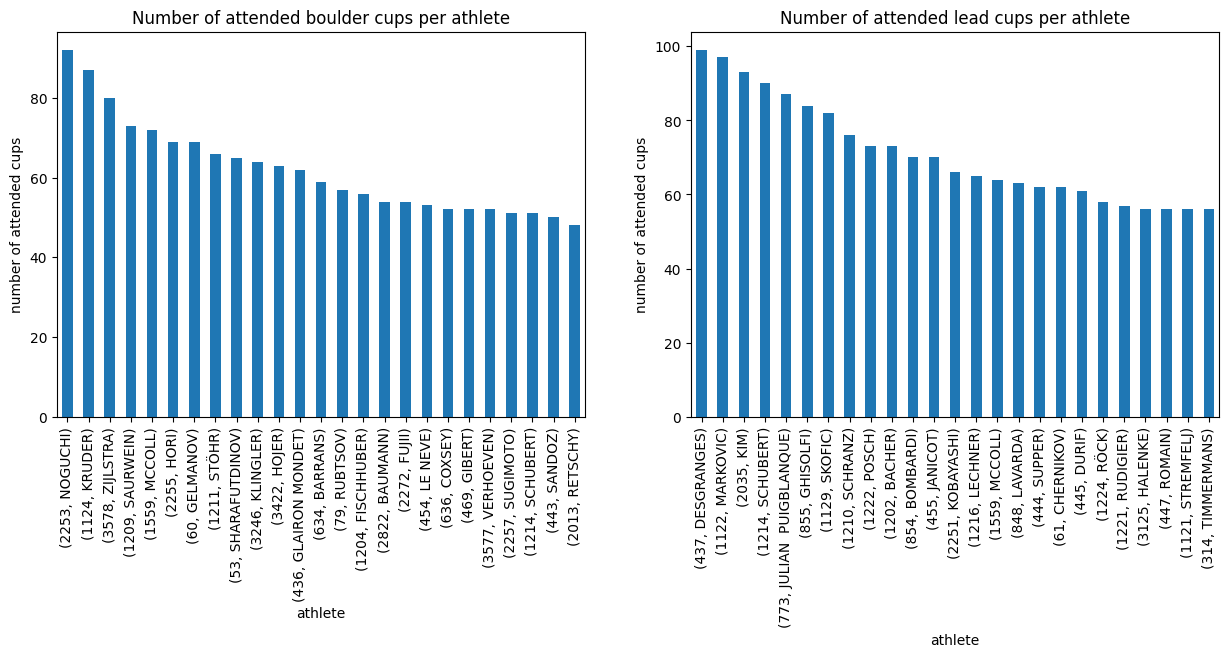

In [7]:
boulder_athletes = (
    boulder.groupby(["athlete_id", "lastname"])["name"]
    .nunique()
    .sort_values(ascending=False)
)
lead_athletes = (
    lead.groupby(["athlete_id", "lastname"])["name"]
    .nunique()
    .sort_values(ascending=False)
)
# plot as bar chart for top 25 athletes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
boulder_athletes.iloc[:25].plot(
    kind="bar",
    title="Number of attended boulder cups per athlete",
    xlabel="athlete",
    ylabel="number of attended cups",
    ax=axes[0],
)
lead_athletes.iloc[:25].plot(
    kind="bar",
    title="Number of attended lead cups per athlete",
    xlabel="athlete",
    ylabel="number of attended cups",
    ax=axes[1],
)
plt.show()

## Have a closer look to a specific cup in 2019

In [8]:
boulder_2019 = boulder[boulder["starts_at"].dt.year == 2019]
lead_2019 = lead[lead["starts_at"].dt.year == 2019]
boulder_athletes_2019 = (
    boulder_2019.groupby(["athlete_id"])["name"].nunique().sort_values(ascending=False)
)
lead_athletes_2019 = (
    lead_2019.groupby(["athlete_id"])["name"].nunique().sort_values(ascending=False)
)
boulder_number_of_cups_2019 = boulder_2019["name"].nunique()
lead_number_of_cups_2019 = lead_2019["name"].nunique()

In [9]:
# filter cups for qualification
boulder_qualification = boulder_2019[
    boulder_2019["round_name"].str.contains("Qualification")
]
# filter entries for our athletes
boulder_qualification = boulder_qualification[
    boulder_qualification["athlete_id"].isin(boulder_athletes_2019.index)
]

In [10]:
boulder_qualification.groupby(["athlete_id", "lastname"])["score"].apply(
    list
).reset_index()

,athlete_id,lastname,score
0,50,SHEMULINKINA,[2T3z 12 14]
1,53,SHARAFUTDINOV,[1T2z 3 7]
2,65,ZAZULIN,"[0T2z 0 6, 1T4z 2 6]"
3,67,TIMONOV,"[4T5z 11 5, 4T5z 11 15, 3T5z 8 10, 4T5z 4 5, 2..."
4,70,ZAIKINA,"[1T3z 3 8, 3T4z 9 8]"
...,...,...,...
442,11650,HERRERA VEGA CENTENO,[0T0z 0 0]
443,11651,WEBER,[0T3z 0 10]
444,11652,CARDENAS VICENTE,[0T0z 0 0]
445,11703,JUMANIYAZOV,[0T0z 0 0]


In [11]:
boulder_year = boulder[
    (boulder["season"] == 2019) & (boulder["round_name"] == "Qualification")
]
boulder_number_of_cups = boulder_year["name"].nunique()
boulder_athletes = (
    boulder_year.groupby(["athlete_id"])["name"].nunique().sort_values(ascending=False)
)
boulder_athletes = boulder_athletes[boulder_athletes >= boulder_number_of_cups - 1]
boulder_year = boulder_year[boulder_year["athlete_id"].isin(boulder_athletes.index)]

## Create final dataframe for all years

In [ ]:
# boulder qualification
final_boulder = pd.DataFrame()
for year in boulder["season"].unique():
    # filter cups for qualification
    boulder_year = boulder[
        (boulder["season"] == year) & (boulder["round_name"] == "Qualification")
    ]
    # count number of athletes per cup
    # asign new column with number of athletes per cup
    boulder_year["total_starter"] = boulder_year["name"].map(
        boulder_year.groupby(["name"])["athlete_id"].nunique()
    )
    boulder_year = (
        boulder_year.groupby(
            [
                "athlete_id",
                "lastname",
                "season",
            ]
        )["score", "total_starter", "name"]
        .agg(list)
        .reset_index()
    )
    final_boulder = pd.concat([final_boulder, boulder_year])

In [ ]:
# lead qualification
final_lead = pd.DataFrame()
for year in lead["season"].unique():
    # filter cups for qualification
    lead_year = lead[(lead["season"] == year) & (lead["round_name"] == "Qualification")]
    # count number of athletes per cup
    lead_year["total_starter"] = lead_year["name"].map(
        lead_year.groupby(["name"])["athlete_id"].nunique()
    )

    lead_year = (
        lead_year.groupby(
            [
                "athlete_id",
                "lastname",
                "season",
            ]
        )["rank", "total_starter", "name"]
        .agg(list)
        .reset_index()
    )
    final_lead = pd.concat([final_lead, lead_year])

In [14]:
# compute points for every row for boulder qualification
overall_points = []
for index, row in final_boulder.iterrows():
    scores = row["score"]
    points = []
    for score in scores:
        # remove non breaking space and replace z, t, b with empty string
        score = (
            score.replace("\xa0", " ")
            .lower()
            .replace("z", "")
            .replace("t", " ")
            .replace("b", " ")
        )
        # split score into tops, zones, tops tries, zones tries
        tmp = score.split(" ")
        # if there is no value for tops, zones, tops tries or zones tries, set it to 0
        tops = int(tmp[0]) if len(tmp[0]) > 0 else 0
        zones = int(tmp[1]) if len(tmp[1]) > 0 else 0
        tops_tries = int(tmp[2]) if len(tmp[2]) > 0 else 0
        zones_tries = int(tmp[3]) if len(tmp[3]) > 0 else 0
        # compute score for tops, zones, tops tries and zones tries
        tops_tries_score = (1 / tops_tries) * 10 if tops_tries != 0 else 0
        zones_tries_score = (1 / (zones_tries * 10)) if zones_tries != 0 else 0
        score = tops * 10 + tops_tries_score + zones + zones_tries_score
        points.append(score)
    overall_points.append(points)
final_boulder["points"] = overall_points

In [15]:
# compute points for every row for lead qualification
final_lead["points"] = final_lead.apply(
    lambda x: (np.array(x["total_starter"]) - np.array(x["rank"]))
    / np.array(x["total_starter"]),
    axis=1,
)

## Have a look at one athlete

In [16]:
kruder = final_boulder[final_boulder["lastname"] == "KRUDER"]
kruder.head()

,athlete_id,lastname,season,score,total_starter,name,points
32,1124,KRUDER,2008,"[4t6 4b4, 0t 2b3, 4t6 4b6]","[135, 97, 99]","[IFSC Climbing Worldcup (B) - Hall (AUT) 2008,...","[48.525, 5.033333333333333, 48.516666666666666]"
34,1124,KRUDER,2009,"[3t6 3b3, 1t3 3b4, 4t6 4b5]","[125, 132, 98]","[IFSC Climbing Worldcup (B) - Hall (AUT) 2009,...","[39.36666666666667, 16.35833333333333, 48.52]"
39,1124,KRUDER,2010,"[2t4 3b5, 4t6 5b9, 4t8 5b7, 3t4 5b6, 2t7 5b8, ...","[133, 128, 89, 97, 106, 86, 104]",[IFSC Climbing Worldcup (B) - Greifensee (SUI)...,"[27.35333333333333, 48.01111111111111, 50.0142..."
43,1124,KRUDER,2011,"[1t3 5b10, 5t7 5b6, 3t4 4b4, 1t1 5b5, 3t5 5b5,...","[99, 86, 110, 69, 83, 109, 87, 75, 101]","[IFSC Climbing Worldcup (B,S) - Milano (ITA) 2...","[15.01, 59.016666666666666, 36.525, 13.02, 37...."
42,1124,KRUDER,2012,"[1t1 5b7, 3t5 4b6, 4t8 5b10, 4t10 5b12, 2t2 5b...","[48, 121, 127, 121, 89, 117, 180]","[IFSC Climbing Worldcup (B,S) - Chongqing (CHN...","[13.014285714285714, 37.516666666666666, 50.01..."


In [17]:
ondra = final_boulder[final_boulder["lastname"] == "ONDRA"]
ondra.head()

,athlete_id,lastname,season,score,total_starter,name,points
49,1364,ONDRA,2009,"[5t9 5b9, 2t5 5b13]","[125, 132]","[IFSC Climbing Worldcup (B) - Hall (AUT) 2009,...","[61.01111111111111, 27.00769230769231]"
54,1364,ONDRA,2010,"[5t6 5b5, 4t6 5b6, 5t8 5b5, 5t8 5b5, 5t6 5b6, ...","[133, 128, 97, 106, 86, 104]",[IFSC Climbing Worldcup (B) - Greifensee (SUI)...,"[58.02, 48.016666666666666, 60.02, 60.02, 58.0..."
75,1364,ONDRA,2014,"[4t7 4b7, 4t11 4b9]","[151, 192]",[IFSC Climbing Worldcup (B) - Innsbruck (AUT) ...,"[49.51428571428571, 53.51111111111111]"
67,1364,ONDRA,2015,"[4t10 5b8, 5t6 5b5, 4t4 4b4, 5t6 5b6, 4t7 4b7]","[132, 128, 89, 84, 210]",[IFSC Climbing Worldcup (B) - Toronto (CAN) 20...,"[52.0125, 58.02, 46.525, 58.016666666666666, 4..."
108,1364,ONDRA,2016,[4t4 5b5],[210],[IFSC Climbing World Championships - Paris (FR...,[46.02]


In [18]:
# write schedules for every athlete and every year
for year in final_boulder["season"].unique():
    entries = []
    for athlete in final_boulder["athlete_id"].unique():
        # filter for year and athlete
        athlete_year = final_boulder[
            (final_boulder["season"] == year) & (final_boulder["athlete_id"] == athlete)
        ]
        if len(athlete_year) > 0:
            athlete_entries = [
                [athlete, starter, name]
                for starter, name in zip(
                    athlete_year["total_starter"].values[0],
                    athlete_year["name"].values[0],
                )
            ]
            entries.extend(athlete_entries)
    schedule = pd.DataFrame(entries, columns=["athlete_id", "total_starter", "name"])
    schedule.to_csv(f"../prepared_data/schedules/bouldering/{year}.csv", index=False)

In [19]:
for year in final_lead["season"].unique():
    entries = []
    for athlete in final_lead["athlete_id"].unique():
        # filter for year and athlete
        athlete_year = final_lead[
            (final_lead["season"] == year) & (final_lead["athlete_id"] == athlete)
        ]
        if len(athlete_year) > 0:
            athlete_entries = [
                [athlete, starter, name]
                for starter, name in zip(
                    athlete_year["total_starter"].values[0],
                    athlete_year["name"].values[0],
                )
            ]
            entries.extend(athlete_entries)
    schedule = pd.DataFrame(entries, columns=["athlete_id", "total_starter", "name"])
    schedule.to_csv(f"../prepared_data/schedules/climbing/{year}.csv", index=False)

In [20]:
final_lead["points"] = final_lead["points"].apply(lambda x: np.mean(x))
final_boulder["points"] = final_boulder["points"].apply(lambda x: np.mean(x))

In [21]:
final_lead.head()

,athlete_id,lastname,season,rank,total_starter,name,points
0,41,BIBIK,2007,"[13.0, 26.0]","[117, 68]",[IFSC Climbing Worldcup (S+L) - Chamonix (FRA)...,0.753268
1,48,SINITCYN,2007,"[41.0, 28.0]","[117, 90]",[IFSC Climbing Worldcup (S+L) - Chamonix (FRA)...,0.669231
2,49,MALAMID,2007,"[20.0, 11.0, 35.0, 23.0, 21.0]","[99, 87, 117, 57, 68]","[IFSC Climbing Worldcup (L) - Imst (AUT) 2007,...",0.732013
3,53,SHARAFUTDINOV,2007,"[23.0, 18.0]","[117, 90]",[IFSC Climbing Worldcup (S+L) - Chamonix (FRA)...,0.801709
4,58,CHERESHNEVA,2007,"[20.0, 17.0, 3.0, 8.0, 25.0, 17.0, 13.0, 10.0]","[99, 87, 117, 57, 68, 90, 68, 79]","[IFSC Climbing Worldcup (L) - Imst (AUT) 2007,...",0.820286


In [22]:
# export final results for bouldering and lead
final_format_lead = (
    final_lead.sort_values(["points"])
    .groupby(["season"])["athlete_id", "points"]
    .agg(list)
    .reset_index()
)
final_format_boulder = (
    final_boulder.sort_values(["points"], ascending=False)
    .groupby(["season"])["athlete_id", "points"]
    .agg(list)
    .reset_index()
)
# create a new column with name Losses and insert for every season a list of zeros with the same length
final_format_lead["Losses"] = final_format_lead["points"].apply(lambda x: [0] * len(x))
final_format_boulder["Losses"] = final_format_boulder["points"].apply(
    lambda x: [0] * len(x)
)
# same for Ties
final_format_lead["Ties"] = final_format_lead["points"].apply(lambda x: [0] * len(x))
final_format_boulder["Ties"] = final_format_boulder["points"].apply(
    lambda x: [0] * len(x)
)

# rename columns
final_format_lead.rename(
    columns={"points": "Wins", "season": "Year", "athlete_id": "Teams"}, inplace=True
)
final_format_boulder.rename(
    columns={"points": "Wins", "season": "Year", "athlete_id": "Teams"}, inplace=True
)
final_format_boulder.to_parquet("../prepared_data/bouldering.parquet")
final_format_lead.to_parquet("../prepared_data/climbing.parquet")

C:\Users\DavidHustadt\AppData\Local\Temp\ipykernel_27452\3897684421.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_format_lead = final_lead.sort_values(['points']).groupby(['season'])['athlete_id', 'points'].agg(list).reset_index()
C:\Users\DavidHustadt\AppData\Local\Temp\ipykernel_27452\3897684421.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_format_boulder = final_boulder.sort_values(['points'], ascending=False).groupby(['season'])['athlete_id', 'points'].agg(list).reset_index()


In [23]:
final_format_lead.head()

,Year,Teams,Wins,Losses,Ties
0,2007,"[7378, 5594, 7377, 4962, 6127, 5723, 7376, 335...","[0.014705882352941176, 0.029411764705882353, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2008,"[5838, 5961, 4966, 4812, 5914, 5928, 2929, 482...","[0.3465346534653465, 0.3564356435643564, 0.366...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2009,"[5986, 6029, 6028, 6027, 5973, 6025, 5017, 602...","[0.33636363636363636, 0.37272727272727274, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2010,"[1367, 5038, 5021, 5037, 5020, 5036, 3727, 501...","[0.3894736842105263, 0.4, 0.42028985507246375,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2011,"[6040, 6305, 3187, 5167, 5805, 3978, 6003, 172...","[0.36363636363636365, 0.37373737373737376, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
